In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Import distance data

In [2]:
distances = pd.read_csv('distances.csv').set_index('COUNTRY')
distances.columns = ['dist']
distances = distances.dist
#distances /= distances.max()
distances.head()

COUNTRY
Iles Anglo normandes      813
Papouasie               13319
Nouvelle Guinee         14361
Sainte Helene            6967
Suisse                      0
Name: dist, dtype: int64

In [3]:
# Check all distances are there
distances[distances == 0]

COUNTRY
Suisse    0
Name: dist, dtype: int64

In [4]:
def weight_by_dist(df):
    joined = df.T.join(distances, how='inner')
    res = joined.multiply(joined.dist, axis="index")
    res = res[res.columns.difference(['dist'])].T
    res.index = pd.to_numeric(res.index)
    return res

# Visualize the counts

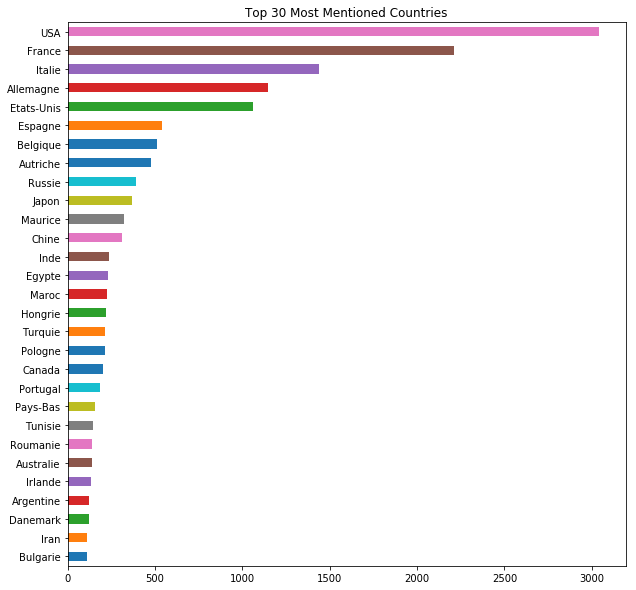

In [5]:
df = pd.read_csv('countries-text-normalized.csv')
countries_by_year = df.groupby('year').sum().iloc[:, 1:]
countries_count = countries_by_year.sum(axis=0).sort_values(ascending=False)
countries_count[1:30][::-1].plot(kind='barh', figsize=(10,10), title='Top 30 Most Mentioned Countries')

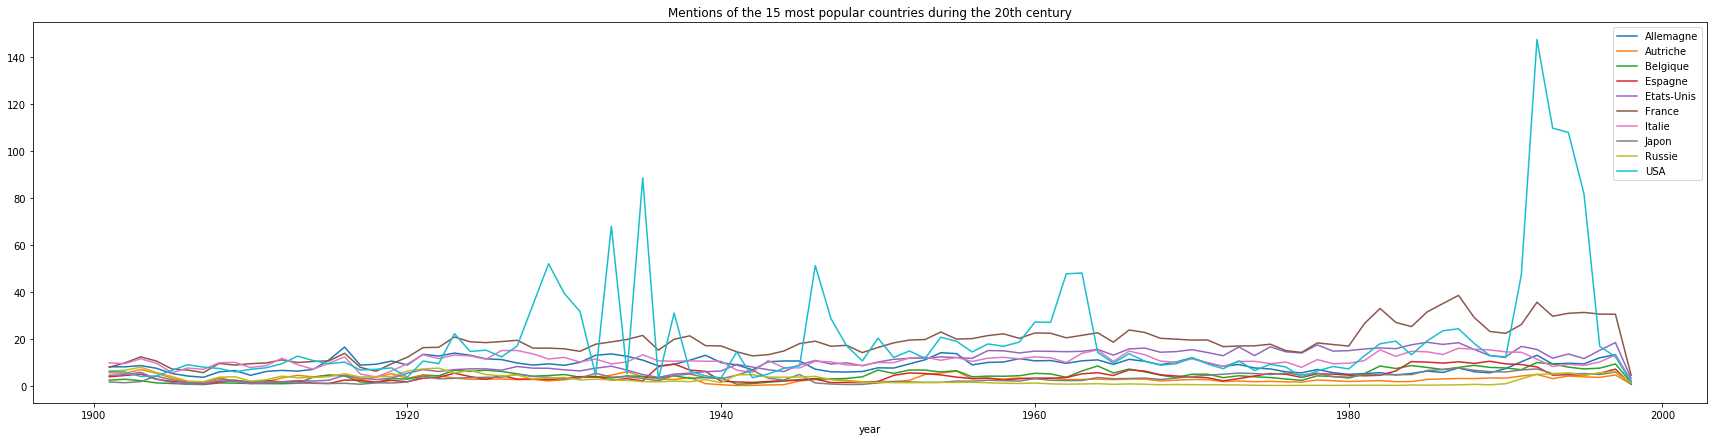

In [6]:
top_countries = set(countries_count.index.values[1:11])
not_top_countries = set(countries_count.index.values) - top_countries
only_top = countries_by_year[countries_by_year.columns.difference(not_top_countries)]
only_top[only_top.index > 1900].plot(figsize=(30,7), title='Mentions of the 15 most popular countries during the 20th century')

# Our Data

In [7]:
def by_year_summed(filename, dist=True, ratio=False):
    """
    Returns a pandas.Series containing the index
    """
    df = pd.read_csv(filename)                # read file
    
    df = df[df.columns.difference(['month'])] # Remove month column
    df = df.groupby('year').sum()             # sum by year
    
    ch = df['Suisse'] + 1                     # avoid dividing by 0
    df = df[df.columns.difference(['Suisse'])]# Remove Switzerland from dataset
    
    if ratio:
        df = df.multiply(1/ch, axis=1)        # compute ratio over Switzerland
    if dist:
        df = weight_by_dist(df)               # Multiply by distance factor
        
    df['sum'] = df.sum(axis=1)                # Sum all countries
    df = df[['sum']]                          # Consider only score
    df.columns = ['our index']                # rename column
    return df['our index']

Text(0.5,1,'titles, normalized')

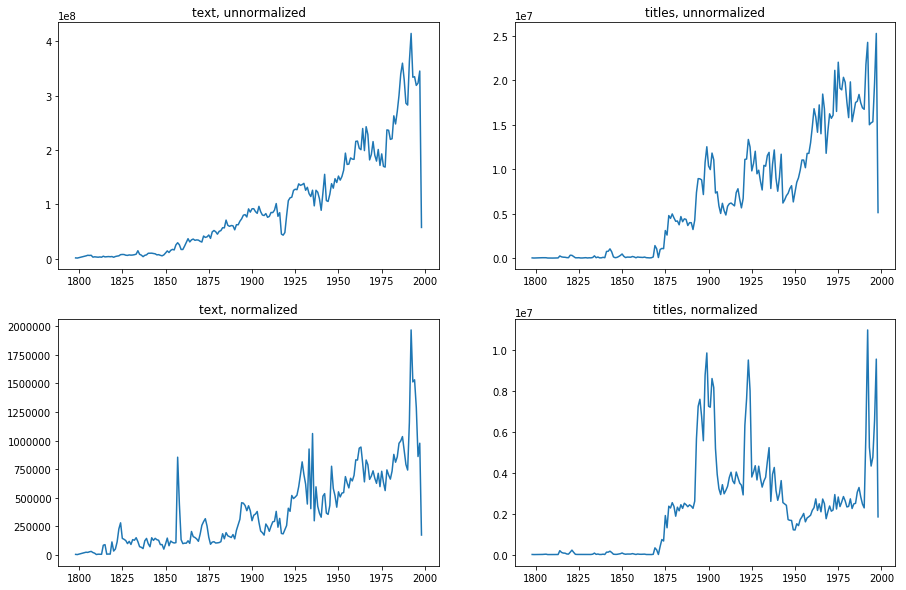

In [24]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
text_unnorm = by_year_summed('countries-text.csv')
titles_unnorm = by_year_summed('countries-titles.csv')
text_unnorm.plot(ax=ax1)
ax1.set_title('text, unnormalized')
titles_unnorm.plot(ax=ax2)
ax2.set_title('titles, unnormalized')

text_norm = by_year_summed('countries-text-normalized.csv')
titles_norm = by_year_summed('countries-titles-normalized.csv')
text_norm.plot(ax=ax3)
ax3.set_title('text, normalized')
titles_norm.plot(ax=ax4)
ax4.set_title('titles, normalized')

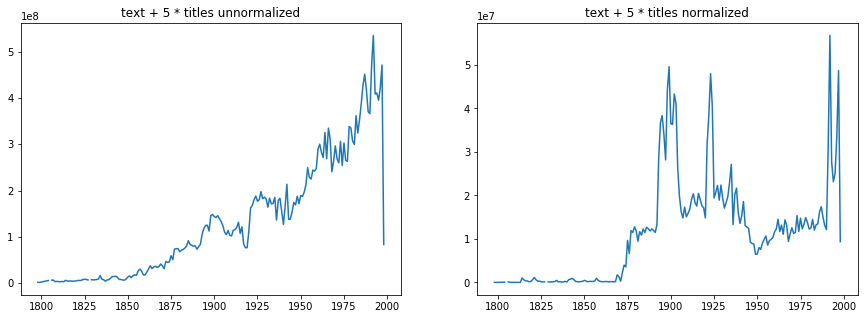

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
text_5titles_unnormalized = (text_unnorm + 5*titles_unnorm)
text_5titles_unnormalized.plot(title='text + 5 * titles unnormalized', ax=ax1)

text_5titles_normalized = (text_norm + 5*titles_norm)
text_5titles_normalized.plot(title='text + 5 * titles normalized', ax=ax2)

# Taking distance into account

In [10]:
combine_with_dist = pd.read_csv('countries-text-normalized.csv')
combine_with_dist.year = combine_with_dist.year.apply(pd.to_numeric)
combine_with_dist = combine_with_dist.groupby('year').sum().iloc[:, 1:]
combine_with_dist = weight_by_dist(combine_with_dist)

In [11]:
combine_with_dist.head()

,Afghanistan,Afrique du Sud,Albanie,Algerie,Allemagne,Andorre,Angola,Antigua et Barbuda,Arabie Saoudite,Argentine,...,USA,Ukraine,Uruguay,Vanuatu,Vatican,Venezuela,Vierges americaines,Vietnam,Zambie,Zimbabwe
1798,0.0,0.0,1.049541,0.0,20.106141,0.0,0.00000,0.0,0.0,0.0,...,1284.823563,0.000000,0.0,0.0,2.254814,0.00000,0.0,0.0,0.0,0.0
1799,0.0,0.0,0.464663,0.0,28.258379,0.0,0.00000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0
1804,0.0,0.0,15.760024,0.0,128.247240,0.0,0.00000,0.0,0.0,0.0,...,13802.602233,7.122827,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0
1805,0.0,0.0,4.614612,0.0,72.671107,0.0,0.00000,0.0,0.0,0.0,...,14042.398028,4.950443,0.0,0.0,0.814561,0.00000,0.0,0.0,0.0,0.0
1806,0.0,0.0,34.928942,0.0,91.988444,0.0,12.23221,0.0,0.0,0.0,...,20193.166602,0.638817,0.0,0.0,0.000000,27.93549,0.0,0.0,0.0,0.0


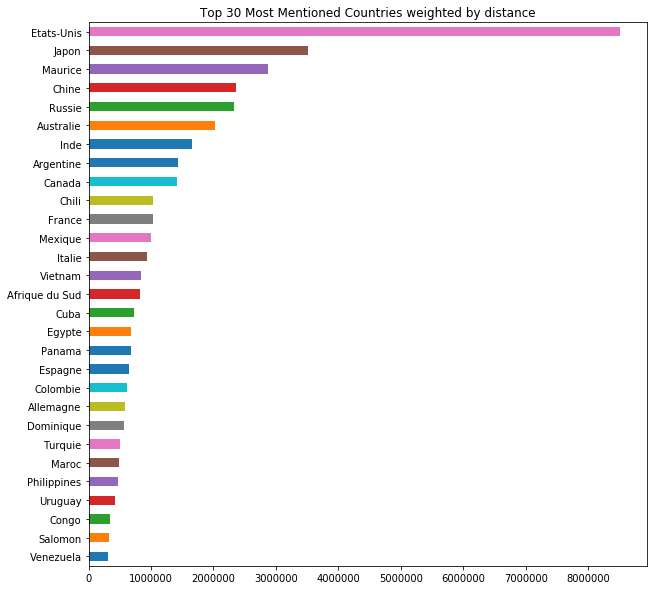

In [12]:
topbydist = combine_with_dist.sum(axis=0).sort_values(ascending=False)
topbydist[1:30][::-1].plot(kind='barh', figsize=(10,10), title='Top 30 Most Mentioned Countries weighted by distance')

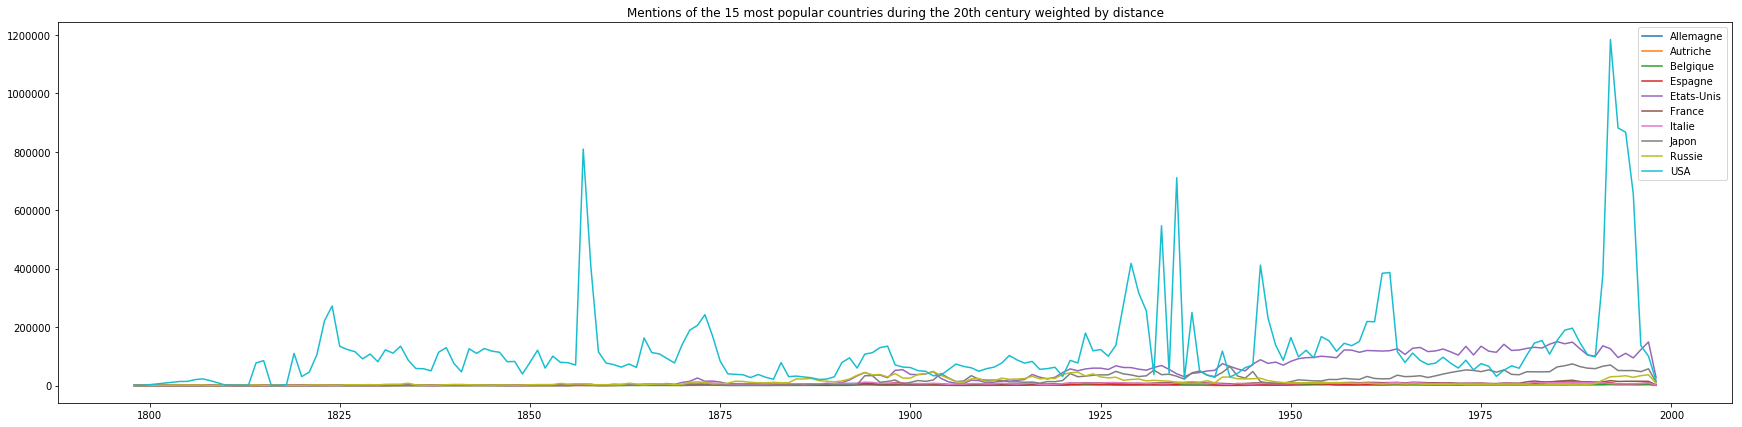

In [13]:
top_countries_by_dist = set(topbydist.index.values[1:11])
not_top_countries_by_dist = set(topbydist.index.values) - top_countries
only_top_by_dist = combine_with_dist[combine_with_dist.columns.difference(not_top_countries)]
only_top_by_dist.plot(figsize=(30,7), title='Mentions of the 15 most popular countries during the 20th century weighted by distance')

# KOF Data

In [14]:
all_kof = pd.read_excel('KOF_data.xlsx')

In [15]:
swiss_kof = all_kof[all_kof.country == 'Switzerland'] # Retain only Swiss data
swiss_kof = swiss_kof.iloc[:, 2:] # Retain only year and indices
swiss_kof = swiss_kof.set_index('year') # Index by year

In [16]:
swiss_kof.head()

,KOFGI,KOFGIdf,KOFGIdj,KOFEcGI,KOFEcGIdf,KOFTrGIdf,KOFFiGIdf,KOFEcGIdj,KOFTrGIdj,KOFFiGIdj,...,KOFIpGIdf,KOFInGIdf,KOFCuGIdf,KOFSoGIdj,KOFIpGIdj,KOFInGIdj,KOFCuGIdj,KOFPoGI,KOFPoGIdf,KOFPoGIdj
year,,,,,,,,,,,,,,,,,,,,,
1970,72.391129,69.312744,75.469505,66.649139,59.546032,39.298573,79.793495,73.752243,56.223392,91.281097,...,79.627975,93.380112,55.414879,72.447136,69.037819,69.621597,78.682007,76.230194,72.251228,80.209152
1971,72.636917,69.295120,75.978706,66.649139,59.546032,39.298573,79.793495,73.752243,56.223392,91.281097,...,79.881645,93.380112,55.002602,72.577011,69.427444,69.621597,78.682007,76.929047,72.251228,81.606857
1972,73.103912,69.322426,76.885391,66.621391,59.490543,39.187595,79.793495,73.752243,56.223392,91.281097,...,79.881645,93.380112,55.414879,72.706894,69.817070,69.621597,78.682007,78.224136,72.251228,84.197052
1973,74.531502,71.567291,77.495720,67.069153,59.490543,39.187595,79.793495,74.647774,58.014446,91.281097,...,80.135315,93.380112,74.216003,72.836769,70.206703,69.621597,78.682007,78.818405,72.634201,85.002617
1974,74.892609,71.568558,78.216675,67.689705,59.657009,39.520527,79.793495,75.722404,60.163712,91.281097,...,80.135315,93.098312,74.009865,73.323357,70.206703,69.621597,80.141769,79.119225,72.634201,85.604248


In [17]:
swiss_kof.columns

Index(['KOFGI', 'KOFGIdf', 'KOFGIdj', 'KOFEcGI', 'KOFEcGIdf', 'KOFTrGIdf',
       'KOFFiGIdf', 'KOFEcGIdj', 'KOFTrGIdj', 'KOFFiGIdj', 'KOFSoGI',
       'KOFSoGIdf', 'KOFIpGIdf', 'KOFInGIdf', 'KOFCuGIdf', 'KOFSoGIdj',
       'KOFIpGIdj', 'KOFInGIdj', 'KOFCuGIdj', 'KOFPoGI', 'KOFPoGIdf',
       'KOFPoGIdj'],
      dtype='object')

# Compare the two

In [18]:
def join_indices(our_index, their_index):
    """
    Normalizes the values of the two indices before
    joining them.
    
    Both arguments are pandas Series indexed by year.
    """
    # INDEX of BOTH must be the year
    # Both arguments are DF with only one column
    
    # Study the correct time range
    our_index   = our_index[our_index.index >= 1970]
    our_index   = our_index[our_index.index < 1998]
    their_index = their_index[their_index.index >= 1970]
    their_index = their_index[their_index.index < 1998]
    
    # Bring all values in % (val - min) / (max - min)
    our_index_scaled = (our_index - our_index.min()) / (our_index.max() - our_index.min()) * 100
    their_index_scaled = (their_index - their_index.min()) / (their_index.max() - their_index.min()) * 100
    
    # Join and return
    return pd.DataFrame(our_index_scaled).join(pd.DataFrame(their_index_scaled), how='inner')

In [19]:
our_index = by_year_summed('countries-text.csv', ratio=False, dist=True) + 5*by_year_summed('countries-titles.csv', ratio=False, dist=True)

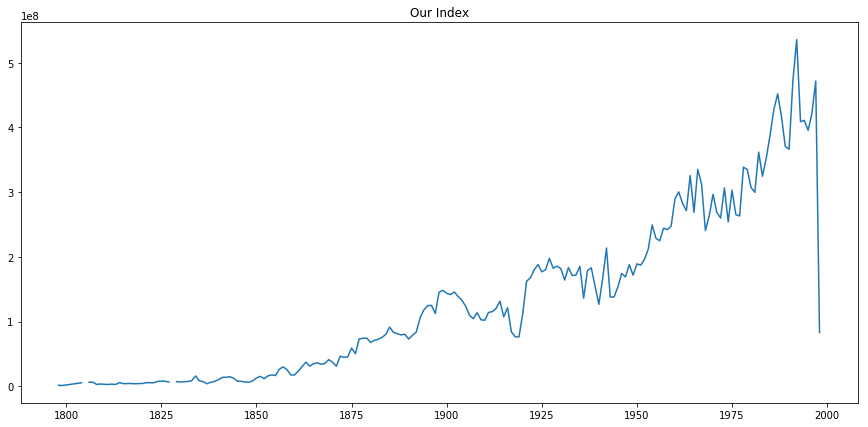

In [23]:
our_index.plot(title='Our Index', figsize=(15,7))

Text(0.5,1,'Correlation= -0.8548019184155622')

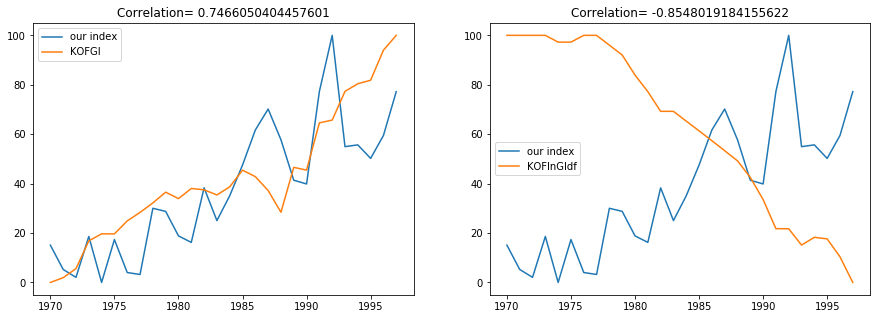

In [21]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
idx1 = join_indices(our_index, swiss_kof['KOFGI'])
idx1.plot(ax=ax1)
ax1.set_title('Correlation= {}'.format(idx1.iloc[:,0].corr(idx1.iloc[:,1])))

idx2 = join_indices(our_index, swiss_kof['KOFInGIdf'])
idx2.plot(ax=ax2)
ax2.set_title('Correlation= {}'.format(idx2.iloc[:,0].corr(idx2.iloc[:,1])))